In [7]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
import warnings
warnings.filterwarnings('ignore')

In [6]:
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
from tensorflow.keras.datasets import reuters
(X_train, y_train), (X_test, y_test) = reuters.load_data()

2121728/2110848 [==============================] - 0s 0us/step


In [8]:
# 데이터 갯수
len(X_train), len(X_test)

(8982, 2246)

In [9]:
# 카테고리 갯수
max(y_train) + 1

46

In [10]:
# 첫번째 뉴스
print(X_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [13]:
type(reuters.get_word_index()), reuters.get_word_index()['the']

(dict, 1)

In [16]:
index_word = {}
for key, value in reuters.get_word_index().items():
    index_word[value] = key
len(index_word)

30979

In [19]:
# 첫번째 기사 복원
' '.join(index_word[index] for index in X_train[0])

'the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [23]:
# 뉴스 기사의 길이
print('뉴스 최대 길이: ', max(len(s) for s in X_train))
print('뉴스 평균 길이: ', sum(map(len, X_train))/ len(X_train))

뉴스 최대 길이:  2376
뉴스 평균 길이:  145.5398574927633


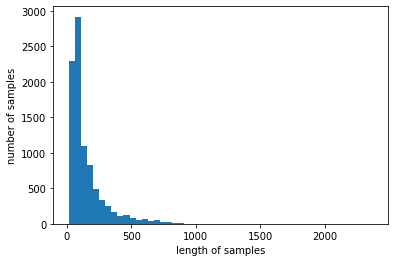

In [24]:
plt.hist([len(l) for l in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

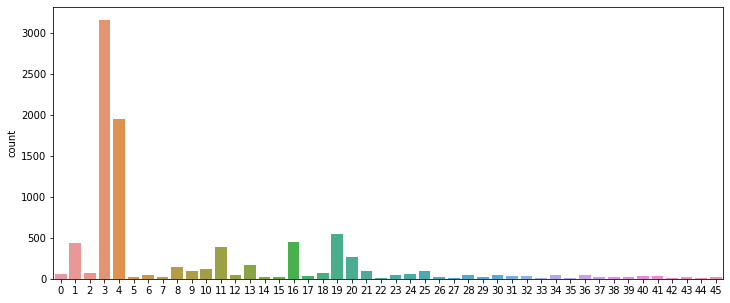

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(y_train)
plt.show()

### LSTM으로 로이터 뉴스 분류
- 단어 : 빈도수 기준 1,000 단어 (총단어수 : 30, 979)
- 문장길이 : 100 단어 (최대 2,376)

In [26]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [30]:
num_words = 1000
max_len = 100

In [29]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  

In [33]:
(X_train, y_train),(X_test, y_test) = reuters.load_data(
        num_words = num_words, test_split=0.2)

In [34]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8982, 100), (2246, 100), (8982, 46), (2246, 46))

## 모델/정의/설정

In [36]:
embedding_dim = 128
hidden_units = 128
num_classes = 46

In [37]:
model = Sequential([ 
    Embedding(num_words, embedding_dim, input_length=max_len),
    LSTM(hidden_units),
    Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          128000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 265,518
Trainable params: 265,518
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [39]:
model_path = 'best-reuters-lstm.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)

In [40]:
hist = model.fit(
    X_train, Y_train, epochs=30, batch_size=128,
    validation_split=0.2, callbacks=[mc,es]
)

Epoch 1/30
56/57 [============================>.] - ETA: 0s - loss: 2.6775 - accuracy: 0.3350
Epoch 00001: val_loss improved from inf to 2.31994, saving model to best-reuters-lstm.h5
57/57 [==============================] - 6s 20ms/step - loss: 2.6760 - accuracy: 0.3354 - val_loss: 2.3199 - val_accuracy: 0.3450
Epoch 2/30
54/57 [===========================>..] - ETA: 0s - loss: 2.0502 - accuracy: 0.4566
Epoch 00002: val_loss improved from 2.31994 to 1.92215, saving model to best-reuters-lstm.h5
57/57 [==============================] - 1s 12ms/step - loss: 2.0392 - accuracy: 0.4589 - val_loss: 1.9221 - val_accuracy: 0.5114
Epoch 3/30
56/57 [============================>.] - ETA: 0s - loss: 1.8266 - accuracy: 0.5278
Epoch 00003: val_loss improved from 1.92215 to 1.77012, saving model to best-reuters-lstm.h5
57/57 [==============================] - 1s 12ms/step - loss: 1.8266 - accuracy: 0.5278 - val_loss: 1.7701 - val_accuracy: 0.5426
Epoch 4/30
56/57 [============================>.] - E

In [43]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

71/71 [==============================] - 1s 4ms/step - loss: 1.2961 - accuracy: 0.6888


[1.296080470085144, 0.6887800693511963]

# 학습과정 시각화
- 하나의 X축, 두개의 Y축 스케일

In [41]:
y_acc = hist.history['accuracy']
y_vacc = hist.history['val_accuracy']
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
x_len = np.arange(1, len(y_acc)+1)

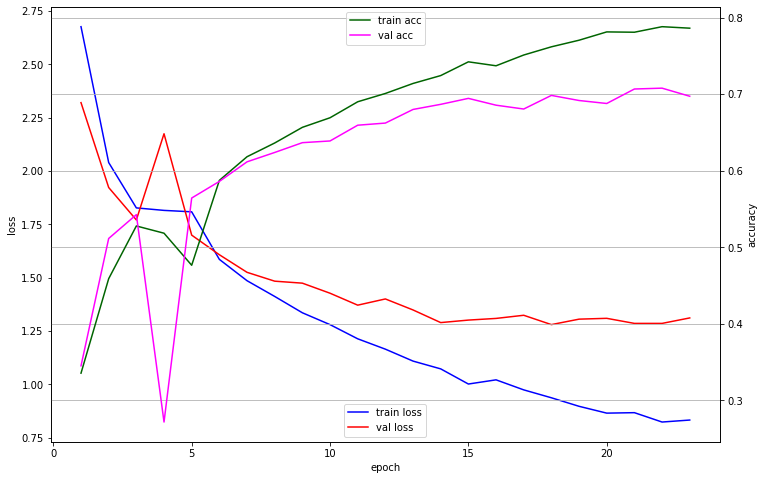

In [42]:
fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c='blue', label='train loss')
ax0.plot(x_len, y_vloss, c='red', label='val loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c='darkgreen', label='train acc')
ax1.plot(x_len, y_vacc, c='magenta', label='val acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='lower center'); ax1.legend(loc='upper center')
plt.grid(); plt.show()

- case2) max_len=300

In [50]:
max_len=300
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8982, 300), (2246, 300), (8982, 46), (2246, 46))

In [ ]:
embedding_dim = 128
hidden_units = 128
num_classes = 46

In [51]:
model2 = Sequential([ 
    Embedding(num_words, embedding_dim, input_length=max_len),
    LSTM(hidden_units),
    Dense(num_classes, activation='softmax')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 128)          128000    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 46)                5934      
                                                                 
Total params: 265,518
Trainable params: 265,518
Non-trainable params: 0
_________________________________________________________________


In [52]:
model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [53]:
model_path = 'best-reuters-lstm.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)

In [54]:
hist2 = model2.fit(
    X_train, Y_train, epochs=50, batch_size=128,
    validation_split=0.2, callbacks=[mc,es]
)

Epoch 1/50
57/57 [==============================] - ETA: 0s - loss: 2.6729 - accuracy: 0.3470
Epoch 00001: val_loss improved from inf to 2.42799, saving model to best-reuters-lstm.h5
57/57 [==============================] - 3s 35ms/step - loss: 2.6729 - accuracy: 0.3470 - val_loss: 2.4280 - val_accuracy: 0.3450
Epoch 2/50
57/57 [==============================] - ETA: 0s - loss: 2.2069 - accuracy: 0.4461
Epoch 00002: val_loss improved from 2.42799 to 2.03586, saving model to best-reuters-lstm.h5
57/57 [==============================] - 2s 27ms/step - loss: 2.2069 - accuracy: 0.4461 - val_loss: 2.0359 - val_accuracy: 0.5031
Epoch 3/50
55/57 [===========================>..] - ETA: 0s - loss: 2.0125 - accuracy: 0.5009
Epoch 00003: val_loss improved from 2.03586 to 1.94302, saving model to best-reuters-lstm.h5
57/57 [==============================] - 2s 28ms/step - loss: 2.0118 - accuracy: 0.5006 - val_loss: 1.9430 - val_accuracy: 0.5192
Epoch 4/50
57/57 [==============================] - E

In [55]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

71/71 [==============================] - 1s 7ms/step - loss: 1.2763 - accuracy: 0.6897


[1.2763347625732422, 0.6896705031394958]

In [56]:
y_acc = hist.history['accuracy']
y_vacc = hist.history['val_accuracy']
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
x_len = np.arange(1, len(y_acc)+1)

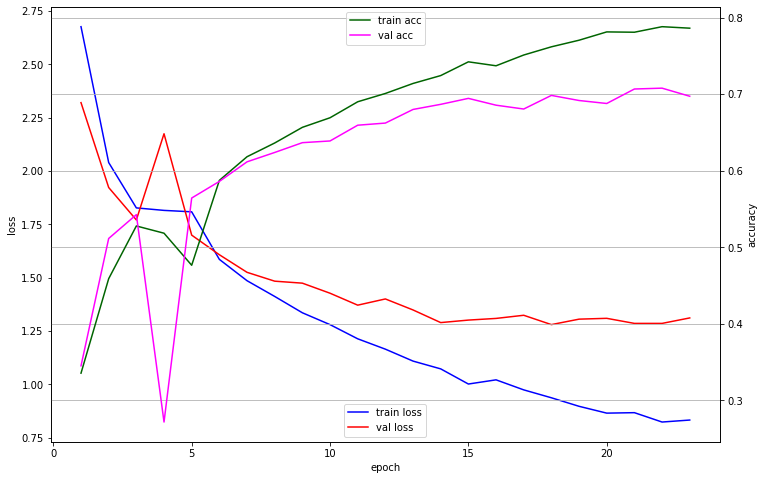

In [57]:
fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c='blue', label='train loss')
ax0.plot(x_len, y_vloss, c='red', label='val loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c='darkgreen', label='train acc')
ax1.plot(x_len, y_vacc, c='magenta', label='val acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='lower center'); ax1.legend(loc='upper center')
plt.grid(); plt.show()